<a href="https://colab.research.google.com/github/MAOK-Yongsuk/SAIG-AI-Projects/blob/main/Rock-Paper-Scissors-Classification/pretrain_rps_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import pandas
import zipfile
import os

In [ ]:
!unzip /content/drive/MyDrive/datasets/data.zip

In [3]:
# extract zip file
train = '/content/ready/train'
val = '/content/ready/val'

In [4]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    featurewise_center=True,
    brightness_range=(0.1,0.9),
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
      rescale = 1.0/255,
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (50, 50),
    color_mode = "rgb",
    class_mode = 'categorical',
    batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
    val,
    target_size = (50, 50),
    color_mode = "rgb",
    class_mode = 'categorical',
    batch_size = 128
)

Found 7061 images belonging to 4 classes.
Found 1958 images belonging to 4 classes.


In [19]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (50, 50, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [20]:
for layer in base_model.layers:
    layer.trainable = False

In [23]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile( 
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics = ['accuracy']
)


In [ ]:
vgghist = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size
)

los: 0.31101441383361816
val_loss: 0.7239347100257874


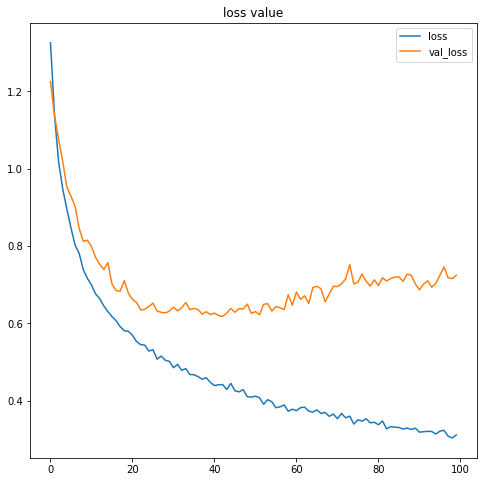

acc: 0.8866291642189026
val_acc: 0.734375


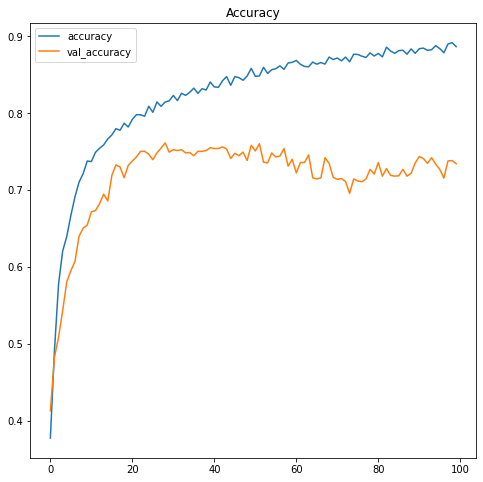

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title('loss value')
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('los:', vgghist.history['loss'][-1])
print('val_loss:', vgghist.history['val_loss'][-1])
plt.show()
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(vgghist.history['accuracy'])
plt.plot(vgghist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
print('acc:', vgghist.history['accuracy'][-1])
print('val_acc:', vgghist.history['val_accuracy'][-1])
plt.show()

In [26]:
model_json = model.to_json()

with open("model/model.json","w") as model_json_file:
    model_json_file.write(model_json)
    
model.save_weights("model/model_weights.h5")
print("model saved")

model saved
